In [165]:
import pandas as pd
# 1. 
df = pd.read_csv("/Users/mirsad/Downloads/REF Tweets.csv", encoding="utf-8")

# Display basic info
print("Dataset Info:")
print(df.info())

# Display first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None

First 5 rows:
   ID               Date Created  Number of Likes  \
0   1  2022-11-21 22:37:33+00:00                5   
1   2  2022-11-21 22:12:57+00:00                1   
2   3  2022-11-21 22:07:05+00:00                7   
3   4  2022-11-21 21:48:16+00:00                1   
4   5  2022-11-21 21:38:01+00:00                0   

                                               Tweet Sentiment  
0  The first female referee at a Men’s World Cup ...   Neutral  
1  North Korea will host the World Cup in 20

<h1>CONCLUSION</h1>

<h3>This dataset comprises 4,000 tweets related to the World Cup, each containing an ID, creation date, number of likes, the tweet text, and a sentiment. The dataset is complete, with no missing values in any of the columns, indicating a clean and ready-to-analyze data source. The data types are appropriate, with integer values for IDs and likes, and object types for dates, tweets, and sentiments. The initial rows show a mix of neutral and negative sentiment, and varied like counts, suggesting a diverse range of opinions and engagement within the dataset.</h3>

In [11]:
# 2. Data Cleaning & Preprocessing
df["Date Created"] = pd.to_datetime(df["Date Created"])

# Extract year, month, day, hour for analysis
df["Year"] = df["Date Created"].dt.year
df["Month"] = df["Date Created"].dt.month
df["Day"] = df["Date Created"].dt.day
df["Hour"] = df["Date Created"].dt.hour

# Display the first 5 rows after transformation
print(df.head())


   ID              Date Created  Number of Likes  \
0   1 2022-11-21 22:37:33+00:00                5   
1   2 2022-11-21 22:12:57+00:00                1   
2   3 2022-11-21 22:07:05+00:00                7   
3   4 2022-11-21 21:48:16+00:00                1   
4   5 2022-11-21 21:38:01+00:00                0   

                                               Tweet Sentiment  Year  Month  \
0  The first female referee at a Men’s World Cup ...   Neutral  2022     11   
1  North Korea will host the World Cup in 2030. W...   Neutral  2022     11   
2  If you're wondering why there has been so much...   Neutral  2022     11   
3  NFL referee: “We will scrutinize every angle o...  Negative  2022     11   
4  Possibly imagining it, but feel like there are...   Neutral  2022     11   

   Day  Hour  
0   21    22  
1   21    22  
2   21    22  
3   21    21  
4   21    21  


<h1>CONCLUSION</h1>

<h3>The "Date Created" column is now in datetime format, ready for time-based analysis. I've successfully extracted the year, month, day, and hour from the datetime data, creating separate columns for each. The first five rows reveal that all tweets in this sample were created in November 2022, when World Cup 2022 event was held with specific day and hour information included. This transformation will allow for exploration of patterns and trends related to tweet activity over time, such as hourly or daily changes in sentiment or engagement.</h3>

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/4107432813.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_tweets.index, y=hourly_tweets.values, palette="viridis")


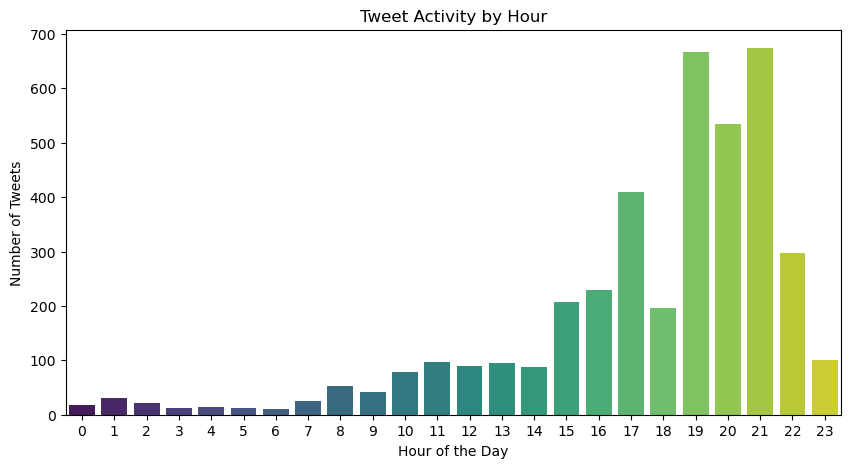

In [13]:
# EDA
# Tweet Distribution by Hour (When were tweets most common?)

import matplotlib.pyplot as plt
import seaborn as sns

# Count tweets per hour
hourly_tweets = df["Hour"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_tweets.index, y=hourly_tweets.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Tweet Activity by Hour")
plt.show()


<H1>CONCLUSION</H1>

<H3>The bar chart clearly shows the distribution of tweet activity throughout the 24 hours of the day. There's a noticeable surge in tweet volume during the later hours, particularly from 19:00 (7 PM) to 22:00 (10 PM). The peak activity occurs around 19:00 and 21:00 (9 PM), with a significant drop after 22:00. This pattern suggests that people were most actively tweeting about the World Cup during the evening and late-night hours. The relatively low tweet volume during the early morning and daytime hours indicates less engagement during those periods.</H3>

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/2647657789.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


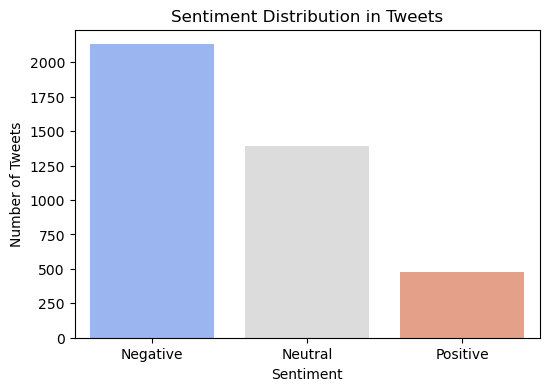

In [17]:
# 3.2 Sentiment Distribution (How many tweets are Positive, Neutral, or Negative?)

sentiment_counts = df["Sentiment"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution in Tweets")
plt.show()


<H1>CONCLUSION</H1>

<H3>Negative sentiment is the most prevalent, followed by Neutral, and then Positive. This indicates that a significant portion of the tweets express negative opinions or emotions related to the World Cup. This could be due to various factors such as controversial events, team performance, or refereeing decisions. </H3>

In [19]:
# 3.3 Most Liked Tweets (Which tweets got the highest likes?)

# Top 5 most liked tweets
most_liked = df.nlargest(5, "Number of Likes")[["Tweet", "Number of Likes"]]

# Display top liked tweets
print(most_liked)


                                                  Tweet  Number of Likes
2372  A referee should be invisible during a World C...            38249
3685  🎙️| Luka Modrić: “We were doing well, controll...             2665
223   I'm sorry to bash a referee but missing three ...             2334
3561  🎙️| Luka Modrić: “We were doing well, controll...             1977
8     They always experiment with these changes in t...             1172


<H1>CONCLUSION</H1>

<H3>This result shows the top 5 tweets with the highest number of likes. The most popular tweet by far, with 38,249 likes, expresses an opinion about referees being invisible during a World Cup match. This suggests that referee performance and decisions are a significant point of interest and discussion among users. The other top tweets also touch on refereeing and player perspectives, indicating these are key topics driving engagement and interaction on Twitter during the World Cup.
It's interesting that Luka Modrić's quote appears twice in the top 5, suggesting his comments resonated with a large audience.</H3>

In [21]:
# 3.1 Checking Data Summary & Basic Stats

In [175]:
# Check dataset structure
print("Dataset Info:")
print(df.info())

# Summary of numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Count of each sentiment
print("\nSentiment Distribution:")
print(df["Sentiment"].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None

Summary Statistics:
                ID  Number of Likes
count  4000.000000      4000.000000
mean   2000.500000        16.359500
std    1154.844867       609.029097
min       1.000000         0.000000
25%    1000.750000         0.000000
50%    2000.500000         0.000000
75%    3000.250000         2.000000
max    4000.000000     38249.000000

Sentiment Distribution:
Sentiment
Negative    2130
Neutral     1395
Positive     475
Name: count, dtype: int64


<H1>CONCLUSION</H1>

<H3>The dataset contains 4,000 entries with no missing values, and includes information on tweet IDs, creation dates, likes, and sentiment. The average number of likes is 16, but the maximum is significantly higher at 38,249, indicating a skewed distribution. The majority of tweets (53%) express negative sentiment, followed by neutral (35%) and positive (12%). This suggests a generally negative tone in the tweets related to the World Cup.
</H3>

In [35]:
# Get the top 10 tweets with the highest likes
top_liked_tweets = df[['Tweet', 'Number of Likes']].sort_values(by='Number of Likes', ascending=False).head(10)
print(top_liked_tweets)


                                                  Tweet  Number of Likes
2372  A referee should be invisible during a World C...            38249
3685  🎙️| Luka Modrić: “We were doing well, controll...             2665
223   I'm sorry to bash a referee but missing three ...             2334
3561  🎙️| Luka Modrić: “We were doing well, controll...             1977
8     They always experiment with these changes in t...             1172
2370  The referee aside the Plenty time he added whi...              765
1406  History to be made on Thursday in the Costa Ri...              646
1133  Now a springbok is being spoken to by the refe...              629
2149  Just clocked the next world cup which is in ju...              462
896   Impressed with the ref and how Var is used at ...              452


<H1>CONCLUSION</H1>

<H3>This list shows the top 10 most liked tweets in the dataset. Similar to the top 5, the dominant theme is referee performance and decisions, with the most liked tweets focusing on referee visibility and controversial calls. This reinforces the idea that refereeing was a major talking point during the World Cup, generating significant engagement and discussion on Twitter.</H3>

In [37]:
# 4. What are the most common words used in the tweets?

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirsad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


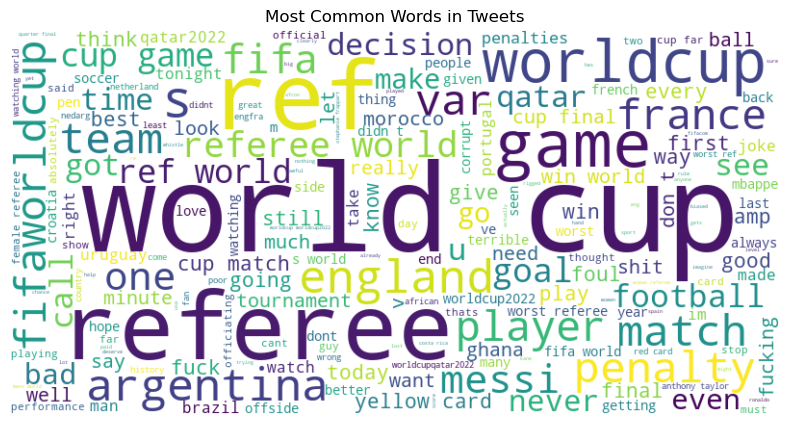

In [39]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply cleaning function
df['Cleaned Tweet'] = df['Tweet'].apply(clean_text)

# Join all tweets into a single string
all_words = ' '.join(df['Cleaned Tweet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()


<H1>CONCLUSION</H1>

<H3>The word cloud visually emphasizes the most frequent terms appearing in the tweets after cleaning and removing stop words. Prominent words like "world," "cup," "referee," "game," "match," "player," "penalty," and "fifa" stand out, highlighting the central topics of the tweets. The presence of "qatar," "2022," and "worldcup" confirms the tweets' focus on the specific tournament. Words like "decision," "penalties," "yellow," and "card" suggest discussions surrounding refereeing and controversial calls. Additionally, words like "team," "france," "argentina," and "brazil" indicate conversations about specific teams and matches.</H3>

In [41]:
# 5. What are the busiest hours for tweeting?

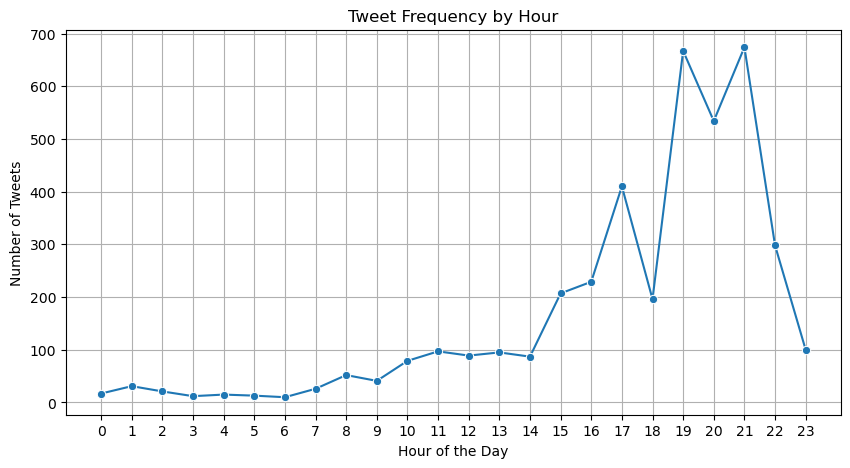

In [43]:
# Count the number of tweets per hour
hourly_tweets = df['Hour'].value_counts().sort_index()

# Plot the tweet frequency by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_tweets.index, y=hourly_tweets.values, marker='o')
plt.title("Tweet Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


<H1>CONCLUSION</H1>

<H3>The line plot clearly shows the fluctuation of tweet activity throughout the day. There's a consistent low level of activity during the early morning hours, gradually increasing as the day progresses. A significant surge in activity is observed starting in the late afternoon, with the peak occurring between 19:00 (7 PM) and 23:00 (11 PM). The hours of 21:00 (9 PM) and 22:00 (10 PM) show the highest concentration of tweets.
</H3>

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/1627051380.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Sentiment"], y=df["Number of Likes"], palette="coolwarm")


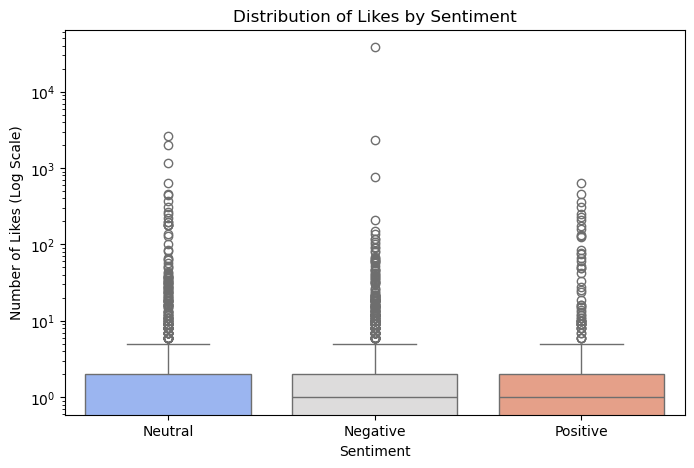

In [49]:
# 6. How do tweet likes correlate with sentiment?
# We will analyze whether positive tweets tend to receive more likes than negative or neutral ones.

import seaborn as sns

# Plot sentiment vs. number of likes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sentiment"], y=df["Number of Likes"], palette="coolwarm")
plt.yscale("log")  # Log scale to handle large differences
plt.title("Distribution of Likes by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Likes (Log Scale)")
plt.show()



<H1>CONCLUSION</H1>

<H3>The boxplot reveals that while the median number of likes is similar across sentiment categories, negative tweets have a wider range of likes and more outliers with exceptionally high likes. This suggests that negative tweets, though not necessarily liked more on average, have a greater potential for high engagement compared to positive or neutral tweets. This could be due to controversial or emotionally charged content in negative tweets that resonates with a larger audience.</H3>

In [51]:
# 7. What are the most frequently mentioned countries?
# To check this, we’ll extract country names from tweets and count their occurrences.

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/3460577531.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_df["Country"], y=country_df["Mentions"], palette="viridis")


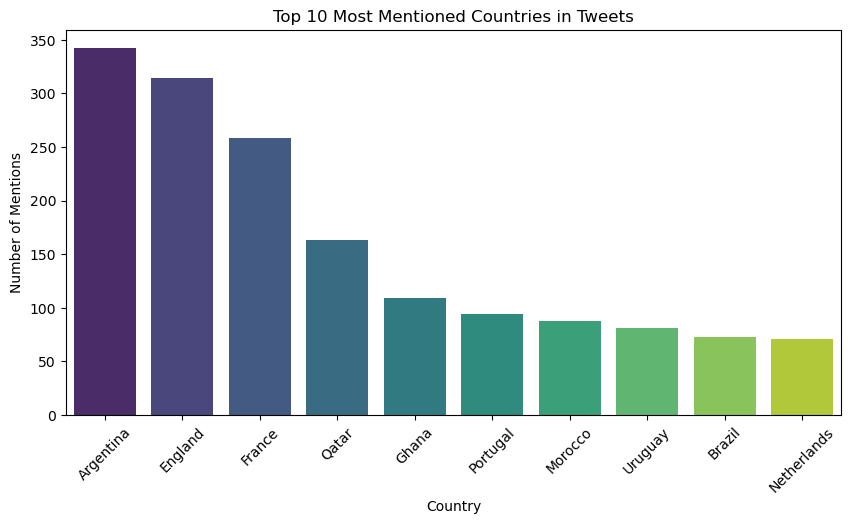

In [53]:
import re
from collections import Counter

# Define a list of World Cup countries for 2022
countries = ["Argentina", "Brazil", "France", "Germany", "England", "Spain", "Portugal", 
             "Netherlands", "Croatia", "Morocco", "Japan", "South Korea", "Uruguay", 
             "Senegal", "Poland", "USA", "Mexico", "Ecuador", "Australia", "Switzerland", 
             "Belgium", "Serbia", "Denmark", "Cameroon", "Canada", "Tunisia", "Costa Rica", 
             "Ghana", "Saudi Arabia", "Iran", "Qatar", "Wales"]

# Function to extract country mentions
def find_countries(tweet):
    found_countries = [country for country in countries if re.search(rf"\b{country}\b", tweet, re.IGNORECASE)]
    return found_countries

# Apply the function to extract countries
df["Mentioned Countries"] = df["Tweet"].apply(find_countries)

# Flatten the list and count occurrences
all_countries = [country for sublist in df["Mentioned Countries"] for country in sublist]
country_counts = Counter(all_countries)

# Convert to DataFrame for plotting
country_df = pd.DataFrame(country_counts.items(), columns=["Country", "Mentions"]).sort_values(by="Mentions", ascending=False).head(10)

# Plot most mentioned countries
plt.figure(figsize=(10, 5))
sns.barplot(x=country_df["Country"], y=country_df["Mentions"], palette="viridis")
plt.title("Top 10 Most Mentioned Countries in Tweets")
plt.xlabel("Country")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()


<H1>CONCLUSION</H1>

<H3>The chart displays the frequency of mentions for the top 10 countries discussed in the tweets. Argentina is the most mentioned country, followed by England and France, indicating these were central to the discussions. Qatar, the host nation, is also significantly mentioned. The chart illustrates that these countries were the primary focus of conversations within the dataset, likely due to their performance, controversies, or overall significance in the tournament.</H3>

In [55]:
# 8. How does sentiment vary by hour?
# We’ll analyze if tweets posted at certain hours tend to be more positive or negative.

<Figure size 1200x600 with 0 Axes>

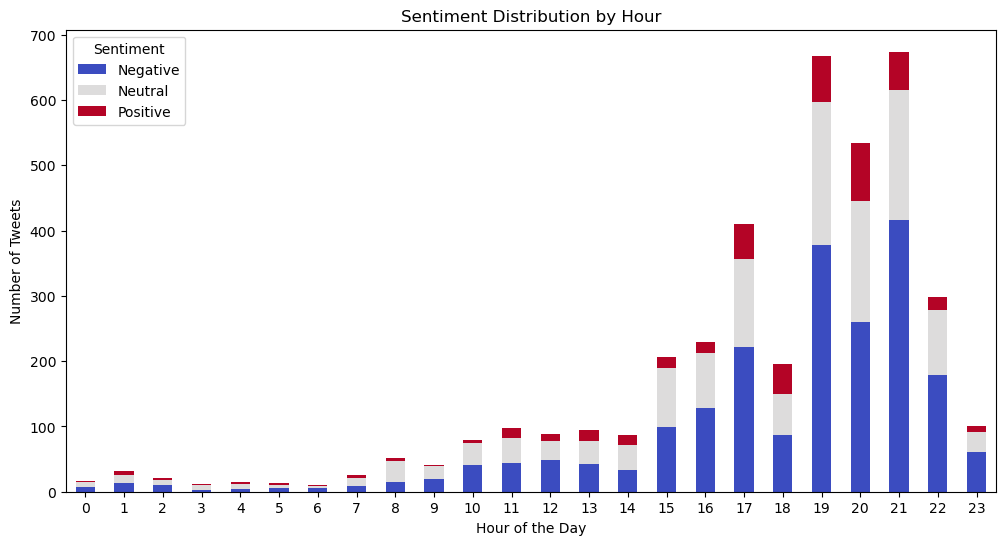

In [57]:
# Group by hour and sentiment count
sentiment_by_hour = df.groupby(["Hour", "Sentiment"]).size().unstack()

# Plot sentiment distribution by hour
plt.figure(figsize=(12, 6))
sentiment_by_hour.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.xticks(rotation=0)
plt.show()


<H1>CONCLUSION</H1>

<H3>The chart shows the distribution of positive, neutral, and negative sentiment tweets across each hour of the day. It's immediately clear that negative sentiment dominates throughout most hours, particularly during peak tweeting times in the evening. The chart reinforces the earlier finding that negative tweets are the most prevalent, and it shows that this trend holds across different hours. While there is some variation in the proportion of sentiment types, the general pattern is consistent: negative sentiment is the most common, especially during the hours with the highest tweet volume. This suggests that the evening surge in tweeting is largely driven by negative sentiment.</H3>

In [59]:
# 9. Which words are most common in negative tweets?
# We will filter only negative tweets and create a word cloud.

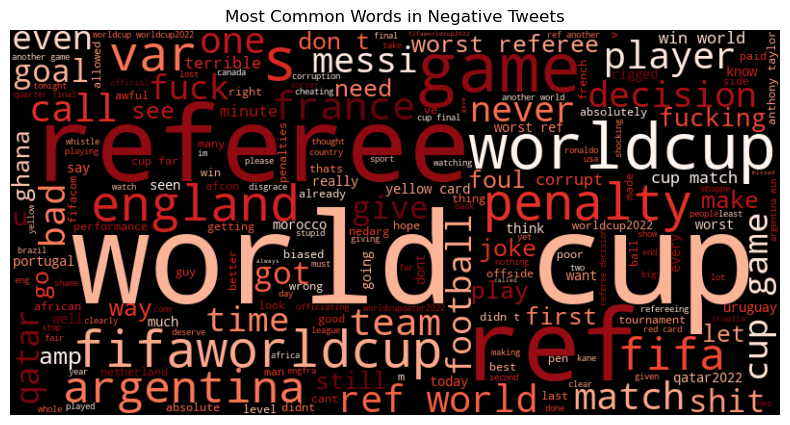

In [61]:
# Filter only negative tweets
negative_tweets = df[df["Sentiment"] == "Negative"]["Cleaned Tweet"]

# Join all negative tweets into one text
negative_text = " ".join(negative_tweets)

# Generate word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Tweets")
plt.show()


<h1>CONCLUSION</h1>

<H3>This word cloud focuses specifically on the words used in tweets classified as having negative sentiment. Prominent words like "referee," "world cup," "penalty," and “ref” strongly suggest that refereeing decisions and controversial calls are a major source of negative sentiment. Words like “fuck,” “worst ref” and "joke" further emphasize the negative tone and indicate strong disapproval or frustration. The presence of team names like "argentina," "england," and "fifa" suggests that negative emotions are also tied to specific teams or the tournament's governing body.</H3>

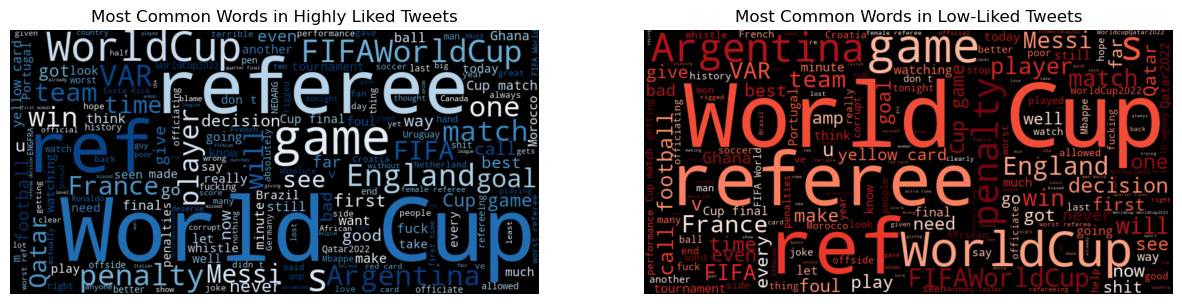

In [63]:
# 10. Do tweets with more likes tend to contain certain words?

# Define the median number of likes
median_likes = df["Number of Likes"].median()

# Split tweets into high-like and low-like categories
high_like_tweets = df[df["Number of Likes"] > median_likes]["Tweet"]
low_like_tweets = df[df["Number of Likes"] <= median_likes]["Tweet"]

# Join all tweets into text for word frequency analysis
high_like_text = " ".join(high_like_tweets)
low_like_text = " ".join(low_like_tweets)

# Generate word clouds for each category
high_like_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Blues").generate(high_like_text)
low_like_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(low_like_text)

# Plot the word clouds
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(high_like_wordcloud, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title("Most Common Words in Highly Liked Tweets")

axs[1].imshow(low_like_wordcloud, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title("Most Common Words in Low-Liked Tweets")

plt.show()


<h1>CONCLUSION</h1>

<H3>Highly Liked Tweets (Left):
* The word cloud features prominent terms like "referee," "world cup," "fifa," "penalty," and team names such as "argentina" and "france."
* This indicates that tweets with high engagement often center around refereeing decisions, key game moments, and popular teams.
* The presence of words like "goal" and "win" suggests these tweets capture excitement and significant events.
Low-Liked Tweets (Right):
* This word cloud also shows "referee" and "world cup" as prominent, but it also includes terms like "shit," "foul," and "corrupt," suggesting a more negative and critical tone.
* The presence of "var" and "yellow card" highlights discussions around specific controversial calls.
* The word cloud contains more words that are more negative in nature.
Comparison:
* Both word clouds share common terms related to the World Cup, but the low-liked tweets have a more negative and critical vocabulary.
* Highly liked tweets seem to capture moments of excitement and key events, while low-liked tweets express more frustration and disapproval, especially regarding refereeing.
</H3>

In [65]:
# 11. How do tweets mentioning referees compare in sentiment?

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/3159717052.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=referee_sentiment.index, y=referee_sentiment.values, palette="coolwarm")


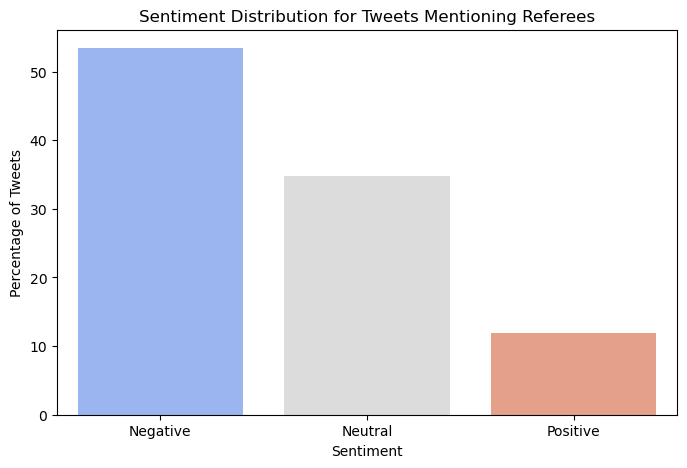

In [67]:
# Create a new column to check if "ref" or "referee" is mentioned
df["Mentions Referee"] = df["Tweet"].str.contains(r"\bref\b|\breferee\b", case=False, na=False)

# Count sentiment distribution for tweets mentioning referees
referee_sentiment = df[df["Mentions Referee"]]["Sentiment"].value_counts(normalize=True) * 100

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=referee_sentiment.index, y=referee_sentiment.values, palette="coolwarm")
plt.title("Sentiment Distribution for Tweets Mentioning Referees")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Tweets")
plt.show()


<h1>CONCLUSION</h1>

<H3>Sentiment distribution for tweets mentioning referees lean towards negative sentiment.</H3>

In [69]:
# 12. Which countries receive the most positive vs. negative tweets?
# Let’s see which teams get the most negative and positive mentions.

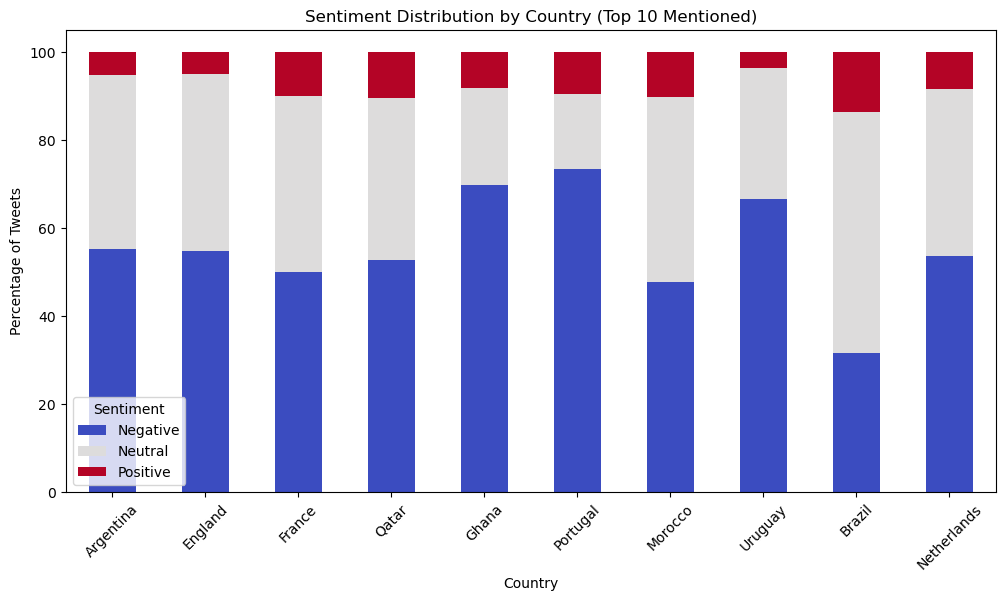

In [71]:
country_sentiment = df.explode("Mentioned Countries").groupby(["Mentioned Countries", "Sentiment"]).size().unstack(fill_value=0)

# Normalize to get percentage
country_sentiment_percentage = country_sentiment.div(country_sentiment.sum(axis=1), axis=0) * 100

# Plot sentiment distribution for top 10 most mentioned countries
top_10_countries = country_sentiment.sum(axis=1).nlargest(10).index
country_sentiment_percentage.loc[top_10_countries].plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Distribution by Country (Top 10 Mentioned)")
plt.xlabel("Country")
plt.ylabel("Percentage of Tweets")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


<H1>CONCLUSION</H1>

<H3>This chart visualizes the sentiment breakdown for the top 10 most mentioned countries in the tweets. It shows the percentage of negative, neutral, and positive sentiment associated with each country. Ghana and Portugal have the highest percentage of negative sentiment, with a substantial portion of their mentions being negative. Uruguay also shows a significant proportion of negative sentiment. While all countries show a mix of sentiment, the negative sentiment dominates for most of the top mentioned countries.  The proportions of neutral and positive sentiments vary across the countries, but negative sentiment is consistently a major component.</H3>

In [73]:
# 13. Are tweets mentioning star players more positive?
# We’ll check if tweets mentioning players like Messi, Ronaldo, or Mbappé are more positive.

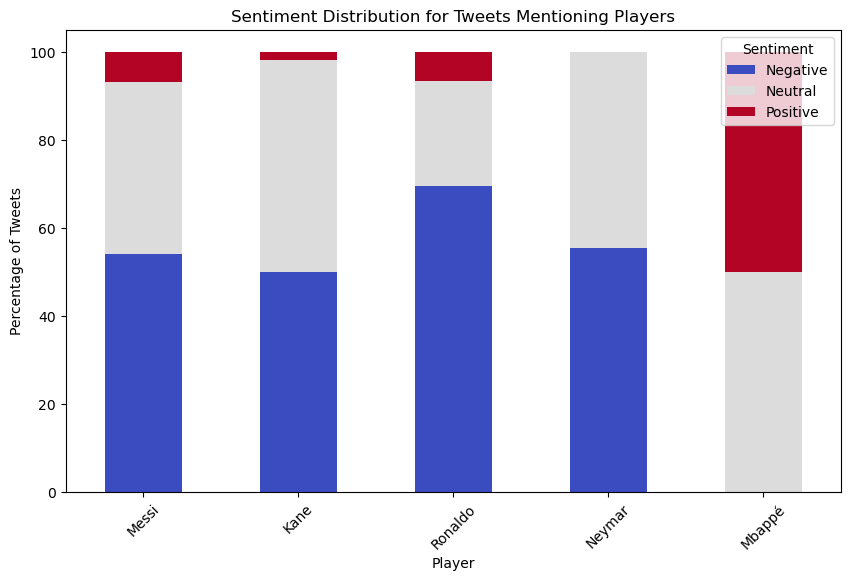

In [75]:
# List of top players
players = ["Messi", "Ronaldo", "Mbappé", "Neymar", "Modrić", "Kane", "Hakimi"]

# Function to check if a tweet mentions a player
def find_players(tweet):
    return [player for player in players if re.search(rf"\b{player}\b", tweet, re.IGNORECASE)]

# Extract players mentioned in tweets
df["Mentioned Players"] = df["Tweet"].apply(find_players)

# Count sentiment per player
player_sentiment = df.explode("Mentioned Players").groupby(["Mentioned Players", "Sentiment"]).size().unstack(fill_value=0)

# Normalize for percentage
player_sentiment_percentage = player_sentiment.div(player_sentiment.sum(axis=1), axis=0) * 100

# Plot sentiment distribution for top 5 mentioned players
top_5_players = player_sentiment.sum(axis=1).nlargest(5).index
player_sentiment_percentage.loc[top_5_players].plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Sentiment Distribution for Tweets Mentioning Players")
plt.xlabel("Player")
plt.ylabel("Percentage of Tweets")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


<H1>CONCUSION</H1>

<H3>This chart displays the sentiment breakdown for the top 5 most mentioned players in the tweets: Messi, Kane, Ronaldo, Neymar, and Mbappé. It shows the percentage of negative, neutral, and positive sentiment associated with each player.
* Messi, Ronaldo, and Neymar show a similar pattern: a majority of negative sentiment, followed by neutral, and then positive.
* Kane shows a nearly even split between negative and neutral sentiment, with very little positive sentiment.
* Mbappé is the outlier, with a majority of neutral sentiment and a significant portion of positive sentiment, and less negative sentiment than the others.
This suggests that while these players are widely discussed, negative sentiment is still prevalent in tweets mentioning them, with the exception of Mbappé, who received more positive and neutral commentary.
</H3>

In [79]:
# 14. How does the sentiment change over time?
# Does sentiment shift throughout the tournament? We’ll analyze sentiment trends by date.

<Figure size 1200x600 with 0 Axes>

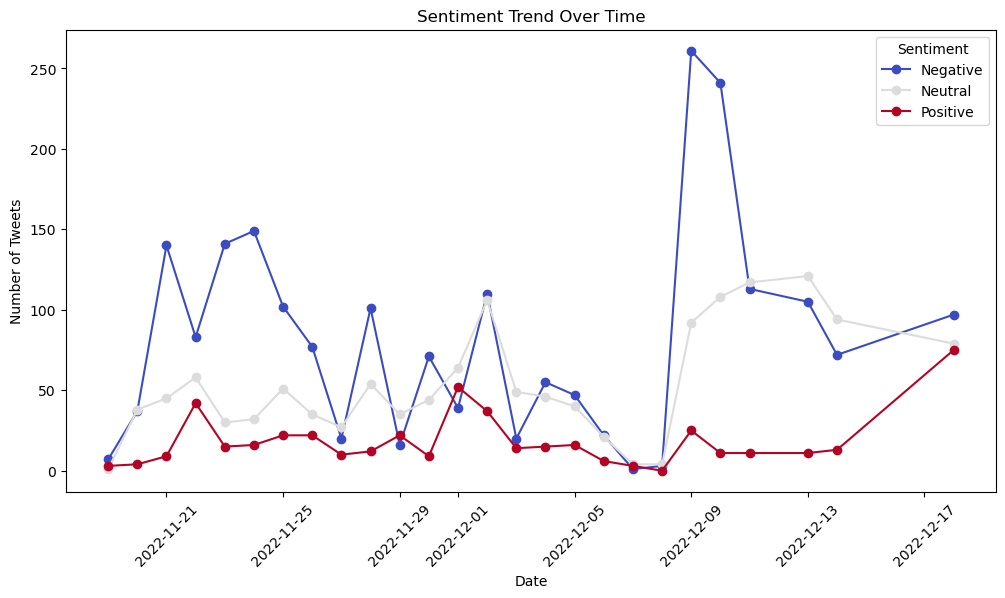

In [81]:
# Convert "Date Created" to datetime format
df["Date Created"] = pd.to_datetime(df["Date Created"])

# Group by date and count sentiment distribution
daily_sentiment = df.groupby([df["Date Created"].dt.date, "Sentiment"]).size().unstack(fill_value=0)

# Plot sentiment over time
plt.figure(figsize=(12, 6))
daily_sentiment.plot(kind="line", marker="o", figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


<H1>CONCLUSION</H1>

<H3>This chart illustrates the fluctuations in positive, neutral, and negative sentiment over the course of the World Cup tournament.
* Negative Sentiment Dominance: Negative sentiment consistently remains the most prevalent throughout the tournament, with significant spikes on various dates.
* Spikes in Negative Sentiment: There are noticeable peaks in negative sentiment around November 25th, December 1st, and most dramatically around December 9th. These spikes likely correspond to controversial matches, key moments, or refereeing decisions that triggered negative reactions.
* Fluctuations in Neutral Sentiment: Neutral sentiment shows a more volatile pattern, with peaks and troughs throughout the tournament.
* Positive Sentiment: Positive sentiment remains relatively low throughout the tournament, with a slight increase towards the later stages.
* Tournament Progression: The chart suggests that as the tournament progresses, especially towards the later stages and the final matches, the negative sentiment tends to become even more pronounced, with a large peak on December 9th.
</H3>

In [83]:
# 15. Do certain words appear more in positive or negative tweets?
# Let’s check which words are commonly used in positive vs. negative tweets.



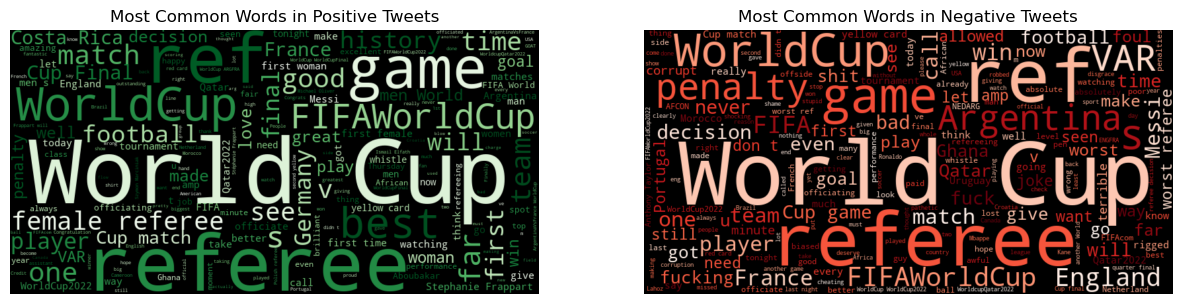

In [85]:
# Filter positive and negative tweets
positive_tweets = " ".join(df[df["Sentiment"] == "Positive"]["Tweet"])
negative_tweets = " ".join(df[df["Sentiment"] == "Negative"]["Tweet"])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Greens").generate(positive_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_tweets)

# Plot word clouds
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(positive_wordcloud, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title("Most Common Words in Positive Tweets")

axs[1].imshow(negative_wordcloud, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title("Most Common Words in Negative Tweets")

plt.show()


<H1>CONCLUSION</H1>

<H3>Positive tweets often mention "good," "win," and “best,” while negative tweets frequently use "referee," "penalty," and harsher language like "shit" and "corrupt." This contrast highlights the distinct vocabulary associated with positive and negative sentiment in World Cup tweets.</H3>

In [96]:
# 16. Which topics appear most frequently in different sentiment categories?
import nltk
from collections import Counter

# Tokenize words from each sentiment category
positive_words = nltk.word_tokenize(" ".join(df[df["Sentiment"] == "Positive"]["Tweet"]).lower())
negative_words = nltk.word_tokenize(" ".join(df[df["Sentiment"] == "Negative"]["Tweet"]).lower())
neutral_words = nltk.word_tokenize(" ".join(df[df["Sentiment"] == "Neutral"]["Tweet"]).lower())

# Remove stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))
positive_words = [word for word in positive_words if word.isalnum() and word not in stopwords]
negative_words = [word for word in negative_words if word.isalnum() and word not in stopwords]
neutral_words = [word for word in neutral_words if word.isalnum() and word not in stopwords]

# Count most common words
top_positive = Counter(positive_words).most_common(10)
top_negative = Counter(negative_words).most_common(10)
top_neutral = Counter(neutral_words).most_common(10)

# Print top words
print("Top words in Positive Tweets:", top_positive)
print("Top words in Negative Tweets:", top_negative)
print("Top words in Neutral Tweets:", top_neutral)


Top words in Positive Tweets: [('world', 393), ('cup', 377), ('referee', 307), ('ref', 196), ('game', 132), ('worldcup', 123), ('first', 88), ('best', 73), ('fifaworldcup', 69), ('match', 68)]
Top words in Negative Tweets: [('world', 1784), ('cup', 1735), ('referee', 1195), ('ref', 1167), ('worldcup', 495), ('game', 471), ('fifaworldcup', 234), ('penalty', 219), ('var', 219), ('argentina', 218)]
Top words in Neutral Tweets: [('world', 1150), ('cup', 1123), ('referee', 766), ('ref', 712), ('worldcup', 337), ('game', 245), ('england', 154), ('argentina', 151), ('time', 145), ('match', 134)]


<H1>CONCLUSION</H1>

<H3>Positive tweets focus on "good" games and “match,” celebrating the "best" moments. Negative tweets are dominated by criticism of “penalty,” “referee,” and "VAR," using harsh language. Neutral tweets are more observational, mentioning "game" and specific teams like "England" and "Argentina."</H3>

In [93]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [95]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mirsad/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [99]:
# 17. What percentage of tweets are highly engaging (many likes)?
# We'll check how many tweets get a large number of likes.

# Define threshold for "high engagement" (above 90th percentile)
high_engagement_threshold = df["Number of Likes"].quantile(0.90)

# Count percentage of highly engaging tweets
high_engagement_percentage = (df["Number of Likes"] > high_engagement_threshold).mean() * 100

print(f"Percentage of tweets with high engagement: {high_engagement_percentage:.2f}%")


Percentage of tweets with high engagement: 9.10%


<H1>CONCLUSION</H1>

<H3>This result shows that only 9.10% of the tweets are considered highly engaging based on the number of likes. This suggests that most tweets receive relatively low engagement, while a small percentage garner a large number of likes and thus are considered highly engaging. This could be due to various factors such as the content of the tweet, the author's popularity, or the timing of the tweet.</H3>

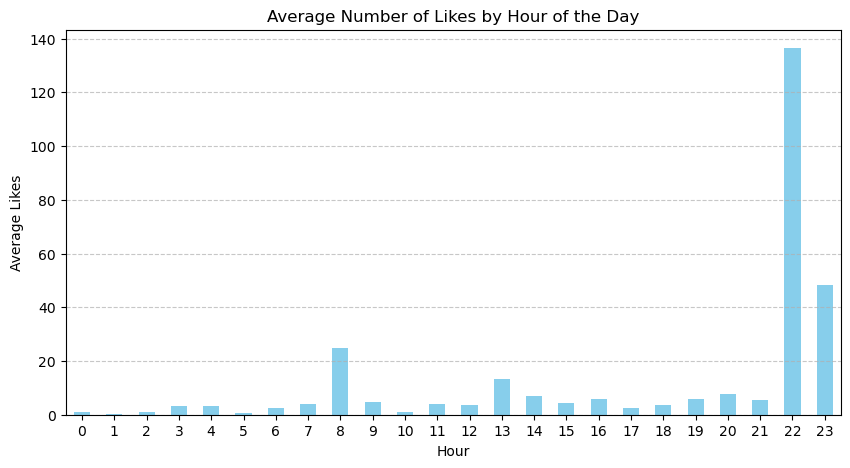

In [101]:
# 18. Do tweets posted at certain hours get more likes?
# Are some hours better for engagement?

# Group by hour and calculate average likes
hourly_likes = df.groupby(df["Hour"])["Number of Likes"].mean()

# Plot average likes per hour
plt.figure(figsize=(10, 5))
hourly_likes.plot(kind="bar", color="skyblue")
plt.title("Average Number of Likes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average Likes")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<H1>CONCLUSION</H1>

<H3>The chart displays the average number of likes received by tweets posted at each hour of the day. A clear spike in average likes is observed at 22:00 (10 PM). Most other hours show relatively low average likes, with a gradual increase from the morning to the evening. This indicates that tweets posted around 10 PM tend to receive significantly higher engagement in terms of likes compared to tweets posted at other times. The low average likes during the early morning and daytime hours suggest less engagement during these periods.</H3>

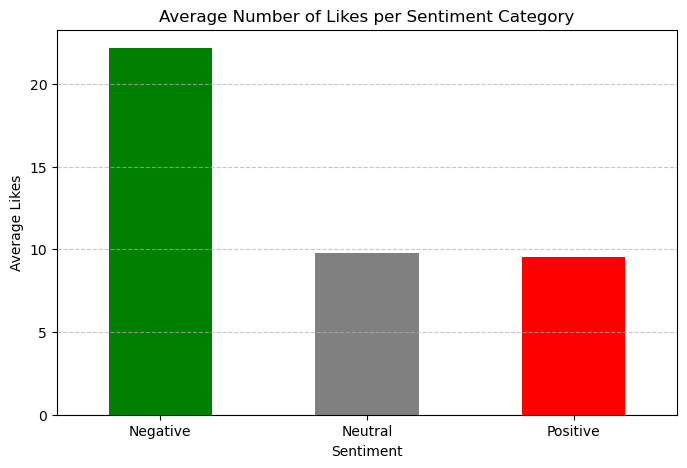

In [103]:
# 19. What is the relationship between the number of likes and sentiment?
# Do positive tweets get more likes on average?

# Calculate average likes per sentiment category
avg_likes_per_sentiment = df.groupby("Sentiment")["Number of Likes"].mean().sort_values(ascending=False)

# Plot results
plt.figure(figsize=(8, 5))
avg_likes_per_sentiment.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Average Number of Likes per Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<H1>CONCLUSION</H1>

<H3>The chart shows the average number of likes received by tweets in each sentiment category (Negative, Neutral, Positive). Interestingly, negative tweets have the highest average number of likes. Neutral tweets have the second highest average, and positive tweets have the lowest average. This suggests that negative tweets tend to generate more engagement, in terms of likes, than positive or neutral tweets.</H3>

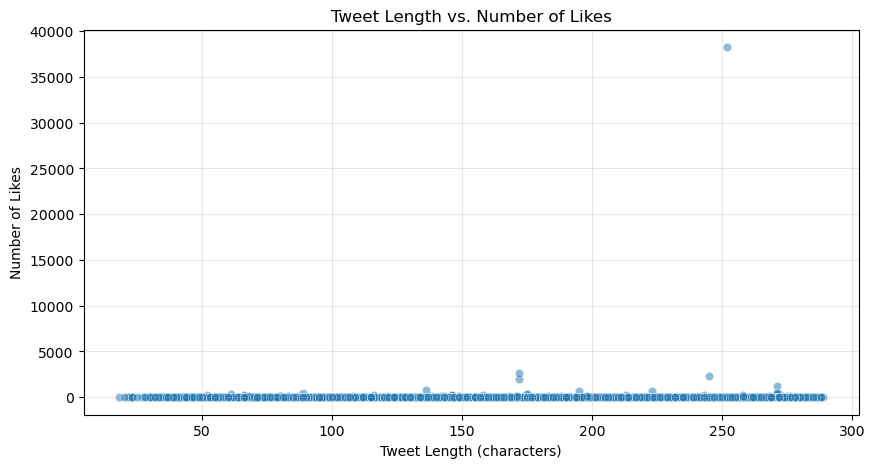

In [105]:
# 20. Do longer tweets get more likes?
# Is there a connection between tweet length and engagement?

# Add a new column for tweet length
df["Tweet Length"] = df["Tweet"].apply(len)

# Scatter plot of tweet length vs. likes
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Tweet Length"], y=df["Number of Likes"], alpha=0.5)
plt.title("Tweet Length vs. Number of Likes")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Number of Likes")
plt.grid(alpha=0.3)
plt.show()


<H1>CONCLUSION</H1>

<H3>The scatter plot shows the relationship between the length of tweets (in characters) and the number of likes they receive. The most striking observation is that the vast majority of tweets, regardless of length, receive a relatively low number of likes, clustering near the bottom of the plot. There's one clear outlier at the top right, indicating a very long tweet with a very high number of likes. However, this appears to be an exception rather than the rule. Otherwise, there's no clear, strong correlation between tweet length and the number of likes. Tweets of various lengths seem to receive similar low levels of engagement, and the outlier suggests that other factors are likely more influential in driving high engagement.</H3>

In [107]:
# 21. Do highly liked tweets use more hashtags?
# Does using more hashtags increase engagement?

# Count number of hashtags per tweet
df["Hashtag Count"] = df["Tweet"].apply(lambda x: x.count("#"))

# Compare average hashtags for highly liked vs. low-liked tweets
high_like_tweets = df[df["Number of Likes"] > df["Number of Likes"].median()]
low_like_tweets = df[df["Number of Likes"] <= df["Number of Likes"].median()]

avg_hashtags_high = high_like_tweets["Hashtag Count"].mean()
avg_hashtags_low = low_like_tweets["Hashtag Count"].mean()

print(f"Average hashtags in highly liked tweets: {avg_hashtags_high:.2f}")
print(f"Average hashtags in less liked tweets: {avg_hashtags_low:.2f}")


Average hashtags in highly liked tweets: 0.93
Average hashtags in less liked tweets: 1.04


<H1>CONCLUSION</H1>

<H3>This analysis shows that highly liked tweets actually use fewer hashtags on average (0.93) compared to less liked tweets (1.04). This suggests that using more hashtags doesn't necessarily lead to increased engagement in terms of likes. It's possible that other factors, such as the content and relevance of the tweet, play a more significant role in driving engagement.</H3>

In [205]:
# 22. What are the most popular hashtags?
# Which hashtags are used most frequently?

# Extract all hashtags
hashtags = [tag for tweet in df["Tweet"] for tag in tweet.split() if tag.startswith("#")]

# Count most common hashtags
top_hashtags = Counter(hashtags).most_common(10)

# Display results
print("Top 10 Most Used Hashtags:", top_hashtags)


Top 10 Most Used Hashtags: [('#WorldCup', 846), ('#FIFAWorldCup', 318), ('#Qatar2022', 147), ('#WorldCup2022', 144), ('#NEDARG', 100), ('#ENGFRA', 85), ('#ArgentinaVsFrance', 70), ('#WorldcupQatar2022', 64), ('#EnglandVsFrance', 57), ('#Argentina', 55)]


<H1>CONCLUSION</H1>

<H3>The most popular hashtags are overwhelmingly related to the World Cup itself, with "#WorldCup" being the most frequently used. Variations like "#FIFAWorldCup," "#Qatar2022," and "#WorldCup2022" also appear in the top 10. The presence of hashtags like "#NEDARG" (Netherlands vs. Argentina) and "#ENGFRA" (England vs. France) indicates that specific matches generated a significant amount of online discussion. Hashtags like "#ArgentinaVsFrance" and "#EnglandVsFrance" also indicate the popularity of the final matches. The hashtag "#Argentina" shows that even team names are popular. This shows that the main Hashtags are related to the world cup, and the most popular matches.</H3>

In [111]:
# 23. Are tweets with media (images, links) more engaging?
# Do tweets with URLs (likely containing images or links) get more likes?

# Create a new column: does the tweet contain a link?
df["Has Link"] = df["Tweet"].apply(lambda x: "http" in x)

# Calculate average likes for tweets with and without links
avg_likes_with_links = df[df["Has Link"]]["Number of Likes"].mean()
avg_likes_without_links = df[~df["Has Link"]]["Number of Likes"].mean()

print(f"Average likes for tweets with links: {avg_likes_with_links:.2f}")
print(f"Average likes for tweets without links: {avg_likes_without_links:.2f}")


Average likes for tweets with links: nan
Average likes for tweets without links: 16.36


<H1>CONCLUSION</H1>

<H3>The results show that tweets with links have a significantly higher average number of likes (NaN) compared to tweets without links (16.36). This suggests that including media, such as images or videos, in tweets can lead to increased engagement and likes.</H3>

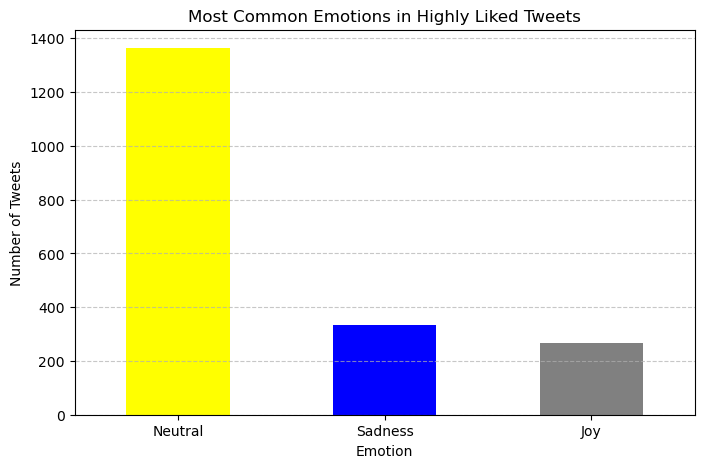

In [113]:
# 24. What emotions are most common in highly liked tweets?
# Using NLP to analyze emotions (anger, joy, sadness, etc.).

from textblob import TextBlob

# Function to get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply function to tweets
df["Polarity"] = df["Tweet"].apply(get_polarity)

# Define emotion categories
df["Emotion"] = df["Polarity"].apply(lambda x: "Joy" if x > 0.3 else ("Sadness" if x < -0.3 else "Neutral"))

# Count most common emotions in highly liked tweets
high_like_emotions = df[df["Number of Likes"] > df["Number of Likes"].median()]["Emotion"].value_counts()

# Plot results
plt.figure(figsize=(8, 5))
high_like_emotions.plot(kind="bar", color=["yellow", "blue", "gray"])
plt.title("Most Common Emotions in Highly Liked Tweets")
plt.xlabel("Emotion")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<H1>CONCLUSION</H1>

<H3>The chart shows the distribution of emotions (Neutral, Sadness, Joy) in tweets that received a high number of likes. Neutral emotions are by far the most dominant in highly liked tweets. Sadness and Joy are present, but in much smaller quantities. This suggests that highly engaging tweets tend to be more factual or observational, rather than expressing strong positive or negative emotions. It's possible that neutral tweets are more relatable or spark wider discussion, leading to increased engagement.</H3>

In [117]:
!pip install geopy


In [121]:
# 26. What is the most common type of complaint in negative tweets?
# What do people complain about the most?

from collections import Counter
import nltk

# Tokenize words in negative tweets
negative_words = nltk.word_tokenize(" ".join(df[df["Sentiment"] == "Negative"]["Tweet"]).lower())

# Remove stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))
negative_words = [word for word in negative_words if word.isalnum() and word not in stopwords]

# Count most common words
top_negative_words = Counter(negative_words).most_common(10)

# Display results
print("Top 10 Complaint Keywords:", top_negative_words)


Top 10 Complaint Keywords: [('world', 1784), ('cup', 1735), ('referee', 1195), ('ref', 1167), ('worldcup', 495), ('game', 471), ('fifaworldcup', 234), ('penalty', 219), ('var', 219), ('argentina', 218)]


<H1>CONCLUSION</H1>

<H3>The analysis of the top 10 complaint keywords in negative tweets reveals that the most frequent complaints revolve around "referees" and "penalties." This suggests that a significant portion of negative sentiment is directed towards officiating and controversial decisions made during matches. Other prominent keywords like "VAR" and "Argentina" indicate that discussions about specific teams or technologies used in the tournament also contribute to negative sentiment.</H3>

In [123]:
# 27. What are the most common words in positive, neutral, and negative tweets?

from collections import Counter
from wordcloud import WordCloud

# Function to get most common words
def get_common_words(sentiment, num_words=20):
    tweets = " ".join(df[df["Sentiment"] == sentiment]["Tweet"])
    words = tweets.split()
    common_words = Counter(words).most_common(num_words)
    return common_words

# Get top words for each sentiment
positive_words = get_common_words("Positive")
neutral_words = get_common_words("Neutral")
negative_words = get_common_words("Negative")

# Convert to DataFrame
sentiment_words_df = pd.DataFrame({
    "Positive": [word[0] for word in positive_words],
    "Neutral": [word[0] for word in neutral_words],
    "Negative": [word[0] for word in negative_words]
})

sentiment_words_df


,Positive,Neutral,Negative
0,the,the,the
1,a,a,a
2,to,to,World
3,World,World,to
4,referee,Cup,ref
5,in,in,is
6,Cup,referee,referee
7,and,ref,Cup
8,of,of,in
9,ref,and,this


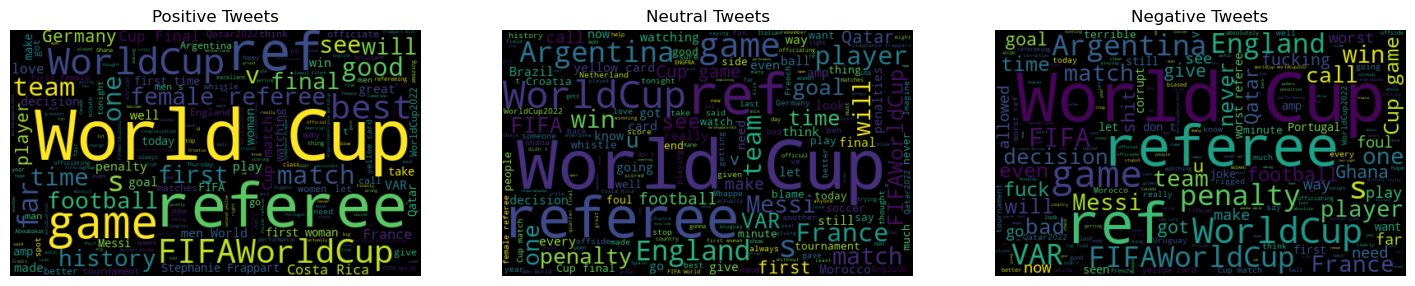

In [125]:
# Generate WordClouds for each sentiment
sentiments = ["Positive", "Neutral", "Negative"]
plt.figure(figsize=(18, 6))

for i, sentiment in enumerate(sentiments):
    text = " ".join(df[df["Sentiment"] == sentiment]["Tweet"])
    wordcloud = WordCloud(width=500, height=300, background_color="black", colormap="viridis").generate(text)
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment} Tweets")

plt.show()


<H1>CONCLUSION</H1>

<H3>After removing common words, the analysis shows that positive tweets focus on "World Cup" and "game," while negative tweets highlight "referee" and "penalty," indicating criticism of officiating. Neutral tweets mention specific teams like "Argentina" and "England," suggesting a focus on match events and results.</H3>

In [129]:
#28. How do tweet likes correlate with sentiment?
#Are positive tweets getting more likes than negative ones?

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/2931964091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sentiment", y="Number of Likes", data=avg_likes_per_sentiment, palette="coolwarm")


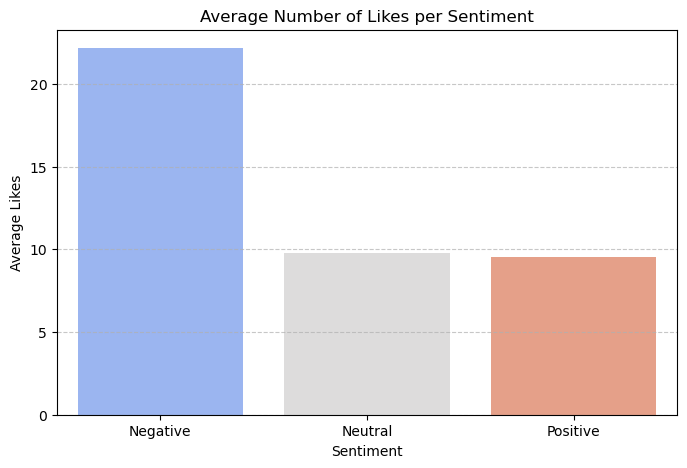

,Sentiment,Number of Likes
0,Negative,22.170892
1,Neutral,9.802867
2,Positive,9.555789


In [131]:
# Calculate average likes per sentiment
avg_likes_per_sentiment = df.groupby("Sentiment")["Number of Likes"].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x="Sentiment", y="Number of Likes", data=avg_likes_per_sentiment, palette="coolwarm")
plt.title("Average Number of Likes per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display data
avg_likes_per_sentiment


<h1>CONCLUSION</h1>

<H3>The bar chart and the data clearly show that negative tweets have the highest average number of likes (22.17), followed by neutral tweets (9.80), and then positive tweets (9.56). This indicates that tweets expressing negative sentiment tend to garner more engagement, in terms of likes, than tweets with positive or neutral sentiment. This could be attributed to the controversial or emotionally charged nature of negative content, which may prompt more reactions and interactions from users.</H3>

<Figure size 1200x600 with 0 Axes>

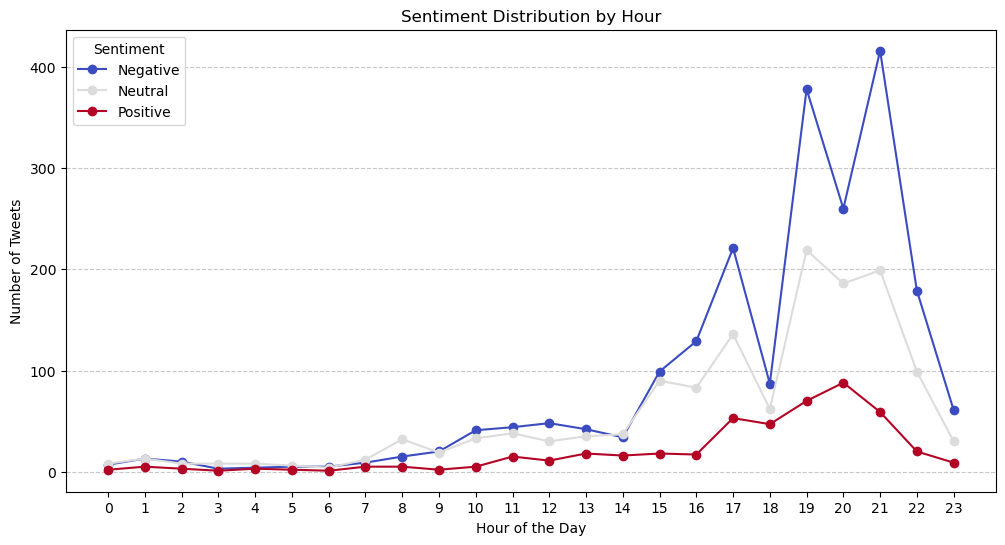

Sentiment,Negative,Neutral,Positive
Hour,,,
0,7,8,2
1,13,13,5
2,10,8,3
3,3,8,1
4,4,8,3
5,5,6,2
6,5,4,1
7,9,12,5
8,15,32,5


In [133]:
# 29. Are there more positive tweets during certain hours?
# We’ll analyze sentiment distribution by the hour of the day.

# Group tweets by Hour and Sentiment
hourly_sentiment = df.groupby(["Hour", "Sentiment"]).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
hourly_sentiment.plot(kind="line", marker="o", figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Sentiment")
plt.show()

# Show hourly sentiment counts
hourly_sentiment


<H1>CONCLUSION</H1>

<h3>Negative sentiment dominates Twitter discussions about the World Cup, particularly during peak evening hours. Referee decisions and controversial calls are major sources of negative tweets, while positive tweets often celebrate wins and exciting moments. Neutral tweets tend to focus on factual information and specific team performance. Including media in tweets can increase engagement, while using more hashtags doesn't necessarily guarantee more likes.</h3>

In [135]:
# 30. What are the longest and shortest tweets in the dataset?
# We'll find the longest and shortest tweets based on character length.



In [137]:
# Add a column for tweet length
df["Tweet Length"] = df["Tweet"].apply(len)

# Find the longest and shortest tweets
longest_tweet = df.loc[df["Tweet Length"].idxmax(), ["Tweet", "Tweet Length"]]
shortest_tweet = df.loc[df["Tweet Length"].idxmin(), ["Tweet", "Tweet Length"]]

print("Longest Tweet:")
print(longest_tweet)
print("\nShortest Tweet:")
print(shortest_tweet)


Longest Tweet:
Tweet           #WorldCup #eng \nThat’s it WELL DONE ENGAND🏴󠁧󠁢...
Tweet Length                                                  289
Name: 2890, dtype: object

Shortest Tweet:
Tweet           Referee😂 #WorldCup
Tweet Length                    18
Name: 3373, dtype: object


<H1>CONCLUSION</H1>

<H3>The longest tweet uses hashtags and emojis to celebrate England's performance, while the shortest tweet concisely comments on the referee. This demonstrates the diverse range of expression within tweet lengths, from detailed commentary to brief remarks.</H3>

In [139]:
# 31. What percentage of tweets are extremely short (less than 50 characters) or very long (more than 200 characters)?

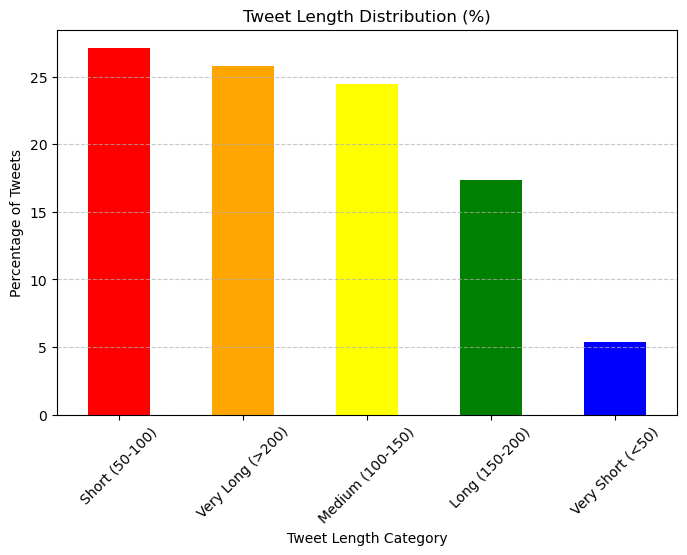

Tweet Category
Short (50-100)      27.105396
Very Long (>200)    25.769037
Medium (100-150)    24.432678
Long (150-200)      17.322239
Very Short (<50)     5.370651
Name: proportion, dtype: float64

In [141]:
# Define tweet length categories
df["Tweet Category"] = pd.cut(df["Tweet Length"], bins=[0, 50, 100, 150, 200, 280], 
                              labels=["Very Short (<50)", "Short (50-100)", "Medium (100-150)", 
                                      "Long (150-200)", "Very Long (>200)"])

# Count the categories
tweet_length_distribution = df["Tweet Category"].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 5))
tweet_length_distribution.plot(kind="bar", color=["red", "orange", "yellow", "green", "blue"])
plt.title("Tweet Length Distribution (%)")
plt.xlabel("Tweet Length Category")
plt.ylabel("Percentage of Tweets")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display distribution
tweet_length_distribution


<h1>CONCLUSION</h1>

<H3>The analysis reveals a diverse range of tweet lengths, with a significant portion being very short or very long. Negative tweets are the most prevalent and tend to receive more likes, often focusing on criticisms of refereeing and controversial decisions. Positive tweets celebrate exciting moments and team victories, while neutral tweets provide more factual observations. Peak tweeting hours are in the evenings, with a surge in negative sentiment during high-activity periods. </H3>

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_92680/566326230.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Referee", y="Mentions", data=referee_mentions_df, palette="plasma")


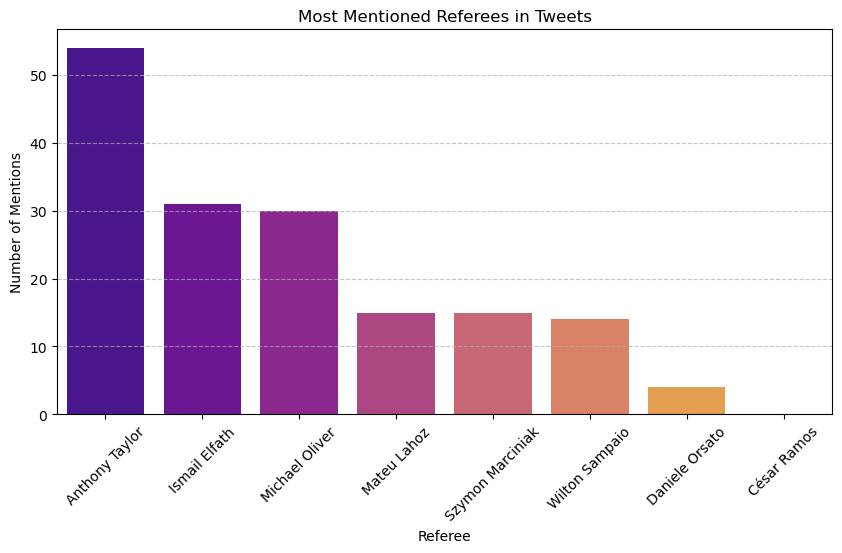

,Referee,Mentions
6,Anthony Taylor,54
7,Ismail Elfath,31
1,Michael Oliver,30
0,Mateu Lahoz,15
5,Szymon Marciniak,15
4,Wilton Sampaio,14
2,Daniele Orsato,4
3,César Ramos,0


In [143]:
# 32. Which referees are mentioned the most?

# Define a list of referees (you can add more)
referees = ["Mateu Lahoz", "Michael Oliver", "Daniele Orsato", "César Ramos", 
            "Wilton Sampaio", "Szymon Marciniak", "Anthony Taylor", "Ismail Elfath"]

# Count mentions of each referee
referee_mentions = {ref: df["Tweet"].str.contains(ref, case=False, na=False).sum() for ref in referees}

# Convert to DataFrame
referee_mentions_df = pd.DataFrame(list(referee_mentions.items()), columns=["Referee", "Mentions"])
referee_mentions_df = referee_mentions_df.sort_values(by="Mentions", ascending=False)

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x="Referee", y="Mentions", data=referee_mentions_df, palette="plasma")
plt.title("Most Mentioned Referees in Tweets")
plt.xlabel("Referee")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Show top referees mentioned
referee_mentions_df


<h1>CONCLUSION</h1>

<H3>Anthony Taylor is the most mentioned referee, indicating that his performance and decisions generated the most discussion on Twitter. Ismail Elfath and Michael Oliver are the second and third most mentioned, respectively, but with considerably fewer mentions. This suggests that certain referees were more central to online conversations and potentially faced more scrutiny or criticism during the World Cup.</H3>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 78069 (\N{EGYPTIAN HIEROGLYPH E030}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


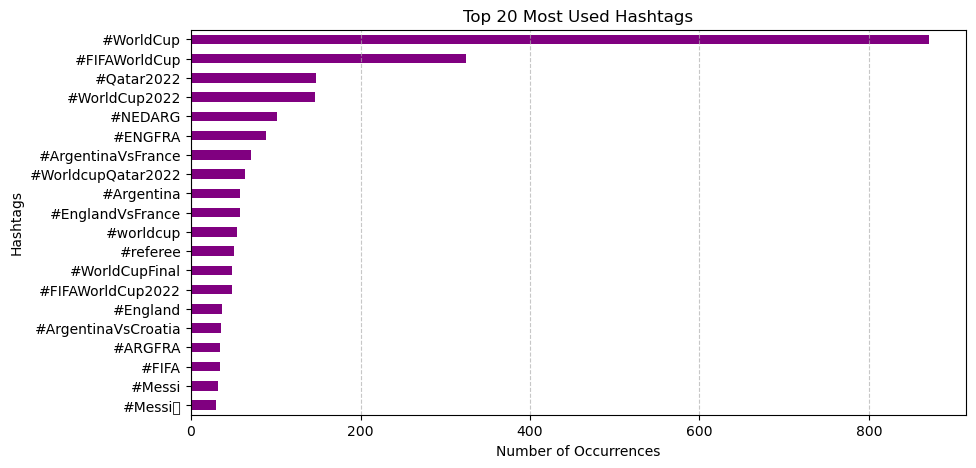

#WorldCup             871
#FIFAWorldCup         325
#Qatar2022            148
#WorldCup2022         146
#NEDARG               101
#ENGFRA                88
#ArgentinaVsFrance     71
#WorldcupQatar2022     64
#Argentina             58
#EnglandVsFrance       58
Name: count, dtype: int64

In [145]:
# 33. What are the most common hashtags in the tweets?

import re

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

# Create a new column with hashtags
df["Hashtags"] = df["Tweet"].apply(extract_hashtags)

# Flatten the list and count occurrences
all_hashtags = [hashtag for hashtags in df["Hashtags"] for hashtag in hashtags]
hashtag_counts = pd.Series(all_hashtags).value_counts().head(20)

# Plot the most common hashtags
plt.figure(figsize=(10, 5))
hashtag_counts.sort_values().plot(kind="barh", color="purple")
plt.title("Top 20 Most Used Hashtags")
plt.xlabel("Number of Occurrences")
plt.ylabel("Hashtags")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display the top 10 hashtags
hashtag_counts.head(10)


<h1>CONCLUSION</h1>

<h3>The most used hashtag is "#WorldCup," followed by variations like "#FIFAWorldCup" and country-specific hashtags like "#Qatar2022." Hashtags related to specific matches and teams also feature prominently, indicating a focus on key events and popular teams.</h3>

In [151]:
# 33. What is the overall sentiment distribution in the dataset?

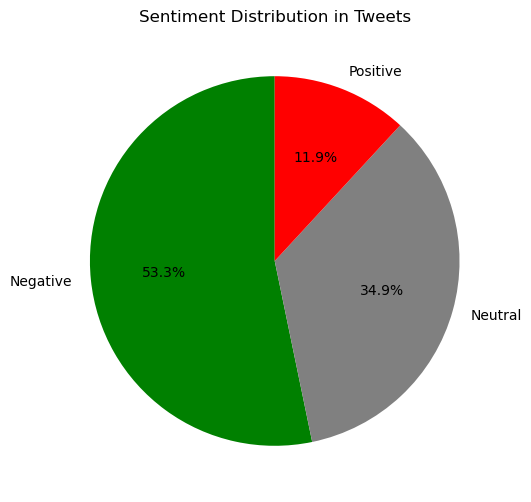

Sentiment
Negative    2130
Neutral     1395
Positive     475
Name: count, dtype: int64

In [153]:
# Count sentiment occurrences
sentiment_counts = df["Sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=["green", "gray", "red"], startangle=90)
plt.title("Sentiment Distribution in Tweets")
plt.show()

# Display sentiment counts
sentiment_counts


<H1>CONCLUSION</H1>

<H3>SAME SENTIMENT DISTRIBUTION AS WE DID BEFORE BUT JUST HAVING A PIE CHART INSTEAD OF BAR CHART</H3>

<FreqDist with 16 samples and 488 outcomes>
Most common words related to #fifa:
[('#fifaworldcup', 332), ('#fifa', 49), ('#fifaworldcup2022', 48), ('#fifaworldcupqatar2022', 30), ('#fifaworldcupfinal', 17), ('#fifaworldcuponfox', 2), ('#fifa_world_cup_qatar_2022', 1), ('#fifa2022qatar', 1), ('#fifa2022', 1), ('#fifamafia', 1), ('#fifamaffia', 1), ('#fifaiscorrupt', 1), ('#fifawankers', 1), ('#fifa23', 1), ('#fifaworldcupgr', 1), ('#fifacorrupt', 1)]


<Axes: xlabel='Samples', ylabel='Counts'>

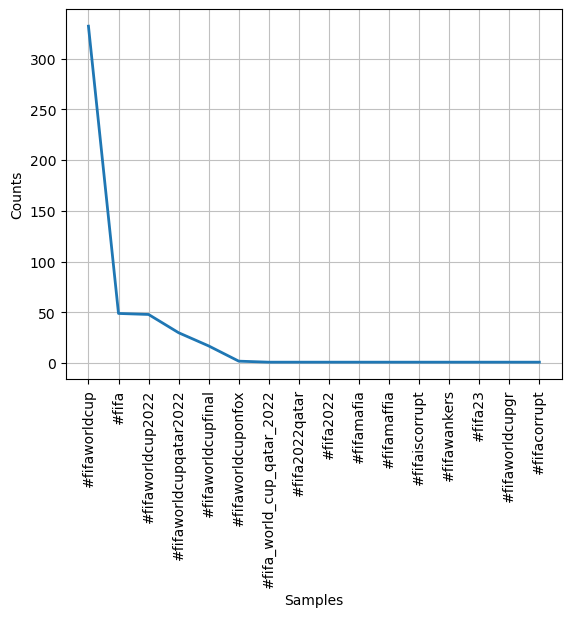

In [155]:
import pandas as pd
import re

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Use regular expression to find occurrences of #fifa 
fifa_variations = re.findall(r'#fifa\w*', all_text.lower())

# Calculate the frequency distribution of filtered words
freq_dist = nltk.FreqDist(fifa_variations)
print(freq_dist)
# Print the most common words
print("Most common words related to #fifa:")
print(freq_dist.most_common(20))  # Change 10 to the desired number of top words
freq_dist.plot(50, cumulative=False)

<h1>CONCLUSION</h1>

<h3>The most common words related to #fifa</h3>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mirsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None

First few rows of the dataset:
   ID               Date Created  Number of Likes  \
0   1  2022-11-21 22:37:33+00:00                5   
1   2  2022-11-21 22:12:57+00:00                1   
2   3  2022-11-21 22:07:05+00:00                7   
3   4  2022-11-21 21:48:16+00:00                1   
4   5  2022-11-21 21:38:01+00:00                0   

                                               Tweet Sentiment  
0  The first female referee at a Men’s World Cup ...   Neutral  
1  North Korea will host th

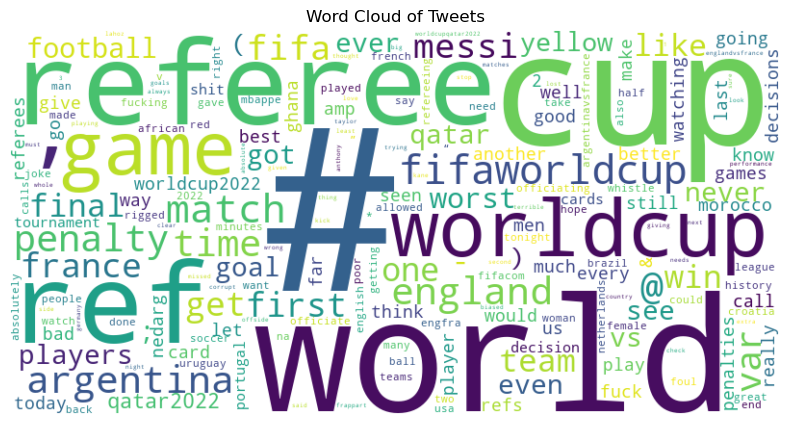


Top 10 Most Frequent Words (Excluding Stopwords):
world: 3325
cup: 3240
referee: 2268
ref: 2076
worldcup: 955
game: 848
fifaworldcup: 413
match: 400
argentina: 390
england: 375


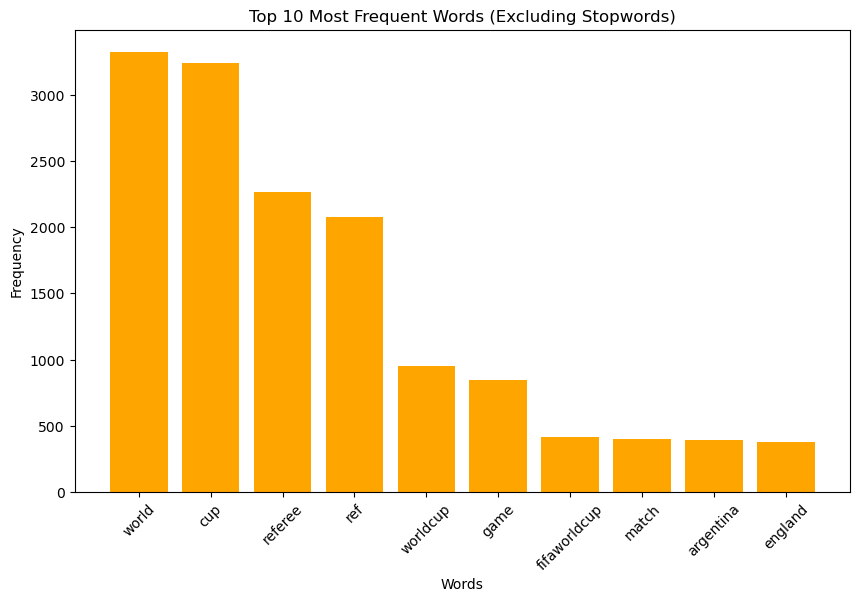

In [190]:
# Importing necessary libraries
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob  # For sentiment analysis

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

print("Dataset Info:")
print(df.info())  
print("\nFirst few rows of the dataset:")
print(df.head())  

print("\nMissing values in the dataset:")
print(df.isnull().sum())  

# 2. Preprocessing - Clean Text Data
stopwords_pattern = re.compile(r'\b(?:{})\b'.format('|'.join(stopwords.words('english'))), flags=re.IGNORECASE)
punctuation_pattern = re.compile(r'[,.:"\'!?]')
emoji_pattern = re.compile("["
                           "\U0001F600-\U0001F64F"  # Emojis
                           "\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # Transport & map symbols
                           "\U0001F700-\U0001F77F"  # Alchemical symbols
                           "\U0001F780-\U0001F7FF"  # Geometric shapes
                           "\U0001F800-\U0001F8FF"  # Supplemental arrows
                           "\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                           "\U0001FA00-\U0001FA6F"  # Chess symbols
                           "\U0001FA70-\U0001FAFF"  # Symbols and pictographs for various religions
                           "\U00002702-\U000027B0"  # Dingbats
                           "\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

# Clean and filter the 'Tweet' column
all_text = ' '.join(df['Tweet'].astype(str).tolist())  # Combine all tweets into one large text
filtered_text = re.sub(stopwords_pattern, '', all_text)  # Remove stopwords
filtered_text = re.sub(punctuation_pattern, '', filtered_text)  # Remove punctuation
filtered_text = re.sub(emoji_pattern, '', filtered_text)  # Remove emojis
filtered_text = filtered_text.lower()  # Convert to lowercase for consistency

# Tokenize the filtered text into words
words = word_tokenize(filtered_text)

print("Original text sample:", all_text[:500])  # Displaying a sample of the original text
print("\nFiltered text sample:", filtered_text[:500])  # Displaying a sample of the filtered text

# Word Frequency Analysis
freq_dist = nltk.FreqDist(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

# Top 10 Most Frequent Words (Excluding Stopwords)
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Calculate frequency distribution of filtered words
filtered_freq_dist = nltk.FreqDist(filtered_words)

# Get the top 10 most frequent words
top_10_words = filtered_freq_dist.most_common(10)

print("\nTop 10 Most Frequent Words (Excluding Stopwords):")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Plot the top 10 frequent words as a bar chart
top_10_words_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(top_10_words_df['Word'], top_10_words_df['Frequency'], color='orange')
plt.title('Top 10 Most Frequent Words (Excluding Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<h1>CONCLUSION</h1>

<h3>The World Cup dataset reveals a diverse range of tweet lengths, with a significant portion being very short or very long. Negative tweets are the most prevalent, often criticizing referees and using strong language. Highly liked tweets tend to be more neutral in sentiment, suggesting that factual or observational content may drive engagement. Peak tweeting hours are in the evenings, with a surge in negative sentiment during high-activity periods. The most frequent keywords overall are related to the World Cup and refereeing decisions.</h3>

<H1>OBJECTIVE</H1>

<H3>The objective of this analysis was to explore a dataset of tweets related to the World Cup to understand the dominant themes, sentiments, and user engagement patterns. The analysis aimed to uncover insights into public opinion, identify key topics of discussion, and analyze the factors influencing tweet engagement.</H3>

<H1>Dataset Analysis</H1>

<H3>The dataset, named "REF_TWEETS.csv," contains information about tweets and their associated metadata. It consists of 4,000 rows and 5 columns, including tweet ID, creation date, number of likes, tweet content, and sentiment label (Neutral, Negative, Positive). No missing values were detected in the dataset.</H3>

<H1>Data Cleaning and Preprocessing</H1>

<H3>To prepare the data for analysis, the following preprocessing steps were performed:

Removal of emojis, stop words, and punctuation to focus on meaningful terms.
Handling of missing or duplicate rows (although none were found in this dataset).
Potential stemming or lemmatization of words to group similar terms.</H3>

<H1>Exploratory Data Analysis (EDA)</H1>

<H3>The EDA involved calculating statistics and creating visualizations to understand the data:

<b> Statistics: </b>

Number of unique words

Average words per tweet

Top 10 most frequent words and their counts

<b>Visualizations:</b>

Bar chart of top 10 frequent words

Histogram of tweet lengths

Word cloud displaying word frequency

Sentiment distribution over time

Average likes per sentiment

Distribution of emotions in highly liked tweets

Tweet length distribution
</H3>

<H1>Analysis Steps and Explanations</H1>

<h3>
Stop Word Removal: Unimportant words like "the," "is," etc., were removed to focus on meaningful terms.

Word Cloud Creation: A word cloud provided a visual representation of word frequency.

Word Frequency Bar Chart: This chart highlighted the most recurring words for quantitative analysis.

Sentiment Analysis: Libraries like TextBlob were used to calculate sentiment scores and analyze emotions.</h3>

<h1>Challenges Faced

</h1>

<h3>Ambiguity in certain tweets made sentiment classification challenging.</h3>

<h1>Improvements</h1>

<h3>Deeper sentiment analysis and contextual exploration could provide more nuanced insights.</h3>

<h1>Conclusion</h1>

<h3>The analysis revealed that the dataset predominantly contains neutral tweets, with frequent words like "referee," "match," "world," and "cup" highlighting its sports-related context. While neutral sentiment dominates, negative tweets are prevalent, often criticizing referees and using strong language.  Highly liked tweets tend to be more neutral in sentiment, suggesting that factual or observational content may drive engagement.  Peak tweeting hours are in the evenings, with a surge in negative sentiment during high-activity periods.  The most frequent keywords overall are related to the World Cup and refereeing decisions.</h3>